In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,periode,cash_in_echannel,cash_out_echannel,cash_in_kantor,cash_out_kantor,cr_ketetapan_total_bkn_sum,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,kas_kantor,kas_echannel
0,2019-07-31,7.303000e+08,-1.304400e+09,1.436722e+11,-1.106104e+11,3.0,9.867358e+11,8.048153e+11,1.419685e+10,7.072647e+11,3.135744e+11,1.928940e+09,2.939100e+09
1,2019-08-01,7.322000e+08,-8.321500e+08,3.144131e+11,-6.710987e+10,3.0,8.962459e+11,8.125611e+11,1.234062e+10,7.011995e+11,3.135744e+11,2.492322e+11,2.839150e+09
2,2019-08-02,1.169800e+09,-6.214000e+08,1.251294e+09,-1.142332e+09,3.0,9.059714e+11,8.127225e+11,1.182022e+10,6.922787e+11,3.135744e+11,2.493411e+11,3.387550e+09
3,2019-08-03,9.134500e+08,-4.240500e+08,0.000000e+00,0.000000e+00,3.0,9.057127e+11,8.127253e+11,1.199640e+10,6.867224e+11,3.135744e+11,2.493411e+11,3.876950e+09
4,2019-08-04,7.752500e+08,-7.779500e+08,9.883331e+10,-8.729274e+10,3.0,9.788347e+11,8.124711e+11,1.232962e+10,6.813438e+11,3.135744e+11,2.608817e+11,3.874250e+09


In [4]:
train_df.describe()

,cash_in_echannel,cash_out_echannel,cash_in_kantor,cash_out_kantor,cr_ketetapan_total_bkn_sum,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,kas_kantor,kas_echannel
count,4.250000e+02,4.250000e+02,4.250000e+02,4.250000e+02,425.0,4.250000e+02,4.250000e+02,4.250000e+02,4.250000e+02,4.250000e+02,4.250000e+02,4.250000e+02
mean,7.033414e+08,-6.992033e+08,8.977969e+10,-6.286235e+10,3.0,8.812831e+11,9.006301e+11,1.376502e+10,6.781954e+11,3.092173e+11,5.749233e+12,3.755702e+09
std,3.421859e+08,3.735076e+08,9.260369e+10,5.224739e+10,0.0,3.866041e+11,1.915942e+11,3.401930e+09,1.093638e+11,3.761426e+10,3.252305e+12,1.024274e+09
min,0.000000e+00,-2.670100e+09,0.000000e+00,-3.447494e+11,3.0,3.820936e+11,7.293214e+11,1.008030e+10,6.170567e+11,2.544115e+11,1.928940e+09,1.834650e+09
25%,4.731000e+08,-8.321500e+08,0.000000e+00,-9.581374e+10,3.0,6.132331e+11,8.071794e+11,1.172827e+10,6.432508e+11,2.801590e+11,2.992979e+12,3.093200e+09
50%,6.357000e+08,-6.359000e+08,7.930647e+10,-6.712278e+10,3.0,8.192550e+11,8.559837e+11,1.281586e+10,6.670075e+11,3.061373e+11,5.488568e+12,3.533750e+09
75%,8.567000e+08,-4.792500e+08,1.264345e+11,0.000000e+00,3.0,1.027486e+12,9.102288e+11,1.521910e+10,6.962898e+11,3.306770e+11,8.453749e+12,4.087700e+09
max,3.744400e+09,0.000000e+00,6.569255e+11,0.000000e+00,3.0,4.678342e+12,3.464395e+12,4.759059e+10,2.794601e+12,4.516209e+11,1.140874e+13,9.070650e+09


In [5]:
train_df['periode'] = pd.to_datetime(train_df['periode'])
train_df = train_df.set_index('periode')

print(train_df.iloc[:3, :3])
print()
print(train_df.iloc[-3:, :3])

            cash_in_echannel  cash_out_echannel  cash_in_kantor
periode                                                        
2019-07-31      7.303000e+08      -1.304400e+09    1.436722e+11
2019-08-01      7.322000e+08      -8.321500e+08    3.144131e+11
2019-08-02      1.169800e+09      -6.214000e+08    1.251294e+09

            cash_in_echannel  cash_out_echannel  cash_in_kantor
periode                                                        
2020-09-28      7.438000e+08       -556200000.0    1.264345e+11
2020-09-29      1.009250e+09       -772100000.0    1.548627e+11
2020-09-30      6.861000e+08       -833250000.0    1.487817e+11


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 425 entries, 2019-07-31 to 2020-09-30
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cash_in_echannel            425 non-null    float64
 1   cash_out_echannel           425 non-null    float64
 2   cash_in_kantor              425 non-null    float64
 3   cash_out_kantor             425 non-null    float64
 4   cr_ketetapan_total_bkn_sum  425 non-null    float64
 5   giro                        425 non-null    float64
 6   deposito                    425 non-null    float64
 7   kewajiban_lain              425 non-null    float64
 8   tabungan                    425 non-null    float64
 9   rata_dpk_mingguan           425 non-null    float64
 10  kas_kantor                  425 non-null    float64
 11  kas_echannel                425 non-null    float64
dtypes: float64(12)
memory usage: 43.2 KB


In [7]:
import matplotlib.dates as mdates

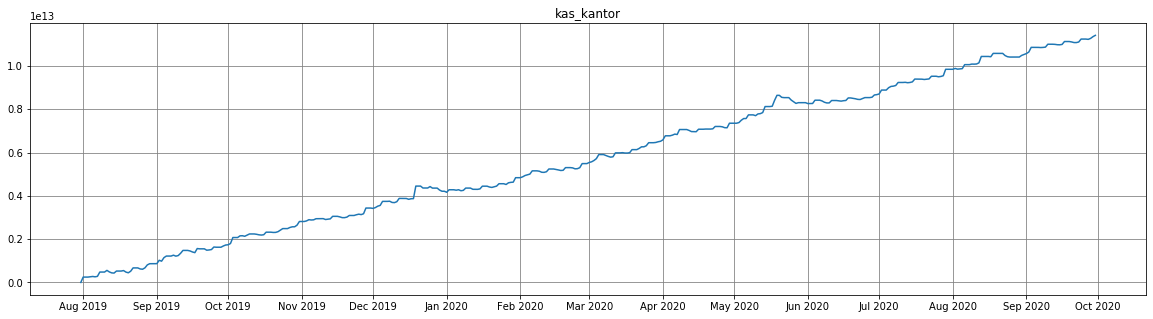

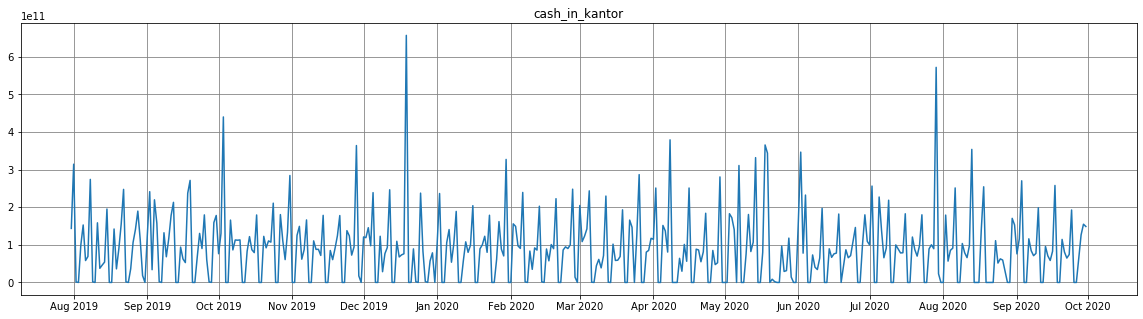

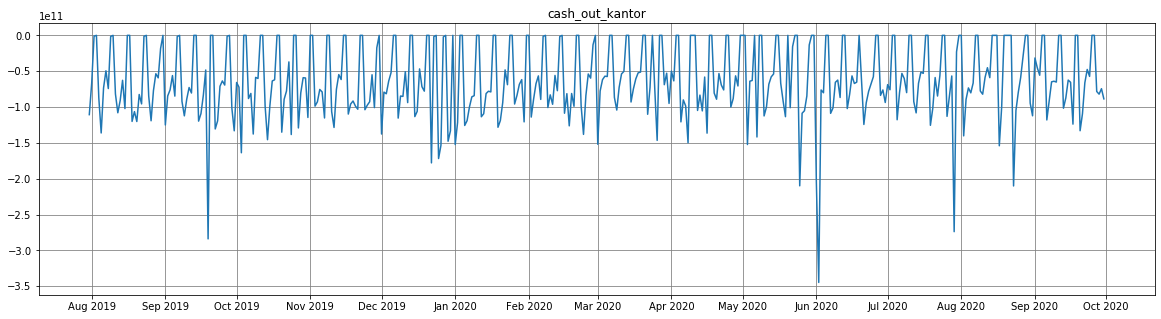

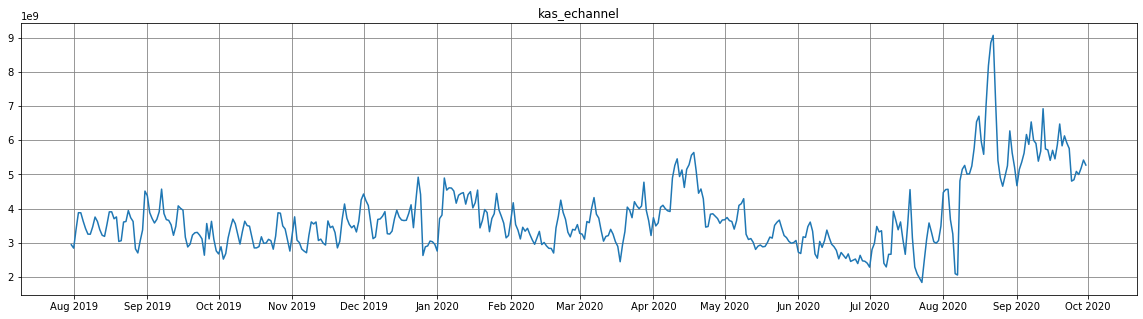

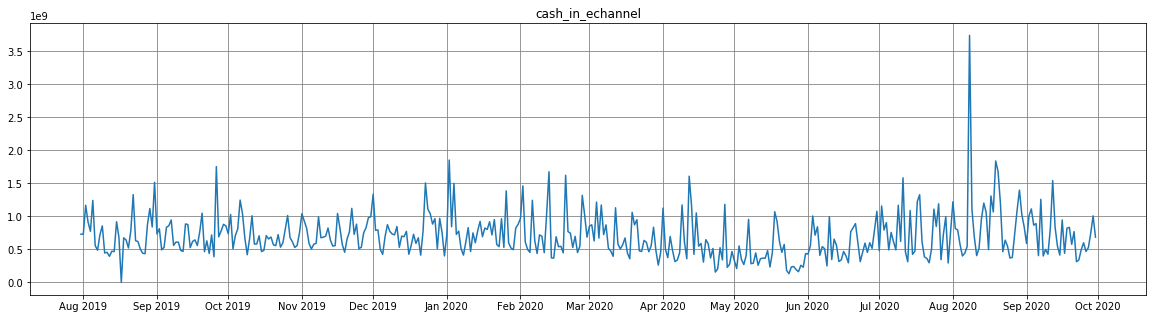

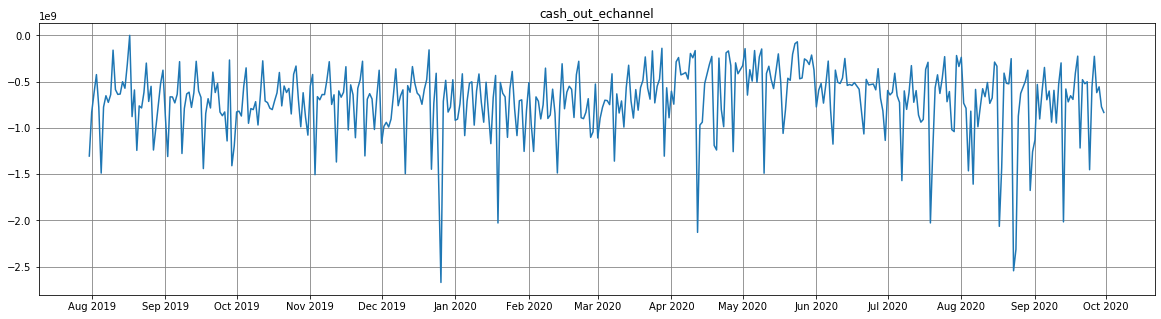

In [8]:
important_cols = ['kas_kantor', 'cash_in_kantor', 'cash_out_kantor', 'kas_echannel', 'cash_in_echannel', 'cash_out_echannel']

for col in important_cols:
    plt.figure(figsize=(20, 5))
    plt.plot(train_df[col])
    plt.grid(color='grey')
    plt.title(col)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error as msle

In [10]:
kas_kantor = train_df['kas_kantor']
kas_ec = train_df['kas_echannel']

X = np.arange(425).reshape(-1, 1)

lr_k = LinearRegression(fit_intercept=True)
lr_e = LinearRegression(fit_intercept=True)

lr_k.fit(X, kas_kantor)
lr_e.fit(X, kas_ec)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.21968481072512558
0.23775623999710452


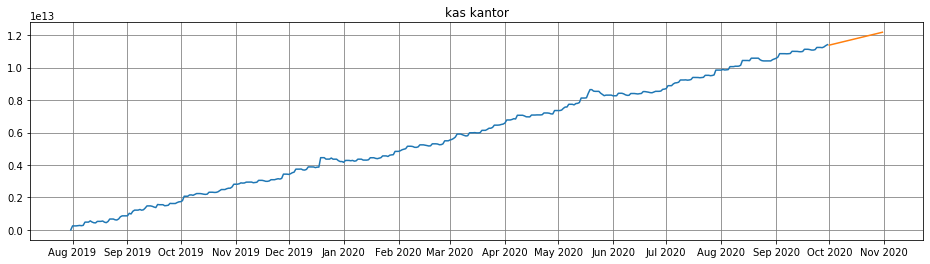

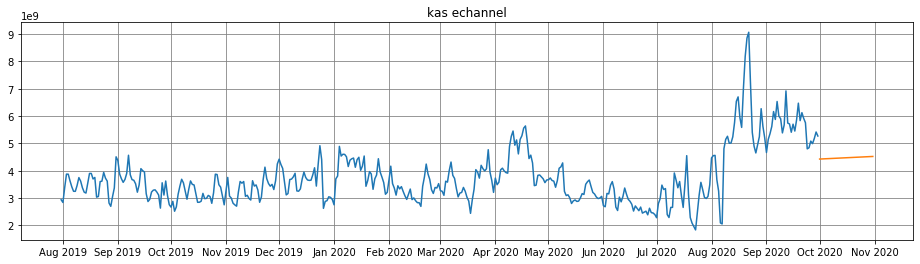

In [11]:
x_pred = np.arange(425, 425 + 31).reshape(-1, 1)
yk_pred = lr_k.predict(x_pred)
ye_pred = lr_e.predict(x_pred)

print(np.sqrt(msle(kas_kantor, lr_k.predict(X))))
print(np.sqrt(msle(kas_ec, lr_e.predict(X))))

pred_date_range = pd.date_range('2020-10-01', '2020-10-31')
yk_pred = pd.Series(yk_pred, index = pred_date_range)
ye_pred = pd.Series(ye_pred, index = pred_date_range)

plt.figure(figsize=(16,4))
plt.plot(kas_kantor)
plt.plot(yk_pred)
plt.grid(color='grey')
plt.title('kas kantor')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.show()

plt.figure(figsize=(16,4))
plt.plot(kas_ec)
plt.plot(ye_pred)
plt.grid(color='grey')
plt.title('kas echannel')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.show()

In [12]:
lr_k.score(x_pred, yk_pred)
lr_e.score(x_pred, ye_pred)

1.0

In [15]:
submission = pd.read_csv('sample_submission.csv')
submission.iloc[:31, 1] = yk_pred.values
submission.iloc[31:, 1] = ye_pred.values
submission.to_csv('submission_1.csv', index=False)